In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix,classification_report

In [3]:
df=pd.read_csv('thebiglist_clean_extended_final.csv')
df

,Stars,isSpicy,hasChicken,hasBeef,hasSeafood,from_Acecook,from_Indomie,from_Itsuki,from_JML,from_KOKA,...,in_Hong Kong,in_Indonesia,in_Japan,in_Malaysia,in_Other,in_Singapore,in_South Korea,in_Taiwan,in_Thailand,in_United States
0,5.0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,3.5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,4.5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,3.5,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3687,3.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3688,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3689,2.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3690,2.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
df['Stars'].value_counts()

5.000    667
3.500    543
3.750    535
4.000    439
4.500    243
3.250    222
4.250    217
3.000    172
2.750    110
2.000     95
2.500     95
4.750     93
1.500     50
0.000     40
1.000     38
2.250     29
1.750     28
0.500     20
0.250     17
1.250     14
1.100      2
3.100      2
2.900      2
0.750      2
2.800      2
4.125      2
2.850      1
2.300      1
3.600      1
3.700      1
3.650      1
0.100      1
3.400      1
3.125      1
1.800      1
3.200      1
2.100      1
2.125      1
0.900      1
Name: Stars, dtype: int64

In [5]:
import matplotlib.pyplot as plt

(array([  58.,   23.,   54.,   79.,  127.,  210.,  399., 1081.,  658.,
        1003.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

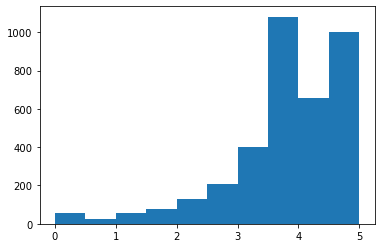

In [6]:
plt.hist(df['Stars'])

In [10]:
len(df[df['Stars']>3.75])

1661

In [13]:
df['binStars']=pd.qcut(df['Stars'],q=2,labels=[0,1])
df

,Stars,isSpicy,hasChicken,hasBeef,hasSeafood,from_Acecook,from_Indomie,from_Itsuki,from_JML,from_KOKA,...,in_Indonesia,in_Japan,in_Malaysia,in_Other,in_Singapore,in_South Korea,in_Taiwan,in_Thailand,in_United States,binStars
0,5.0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,3.5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3.5,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3687,3.5,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3688,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3689,2.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3690,2.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
 df['binStars'].value_counts()

0    2031
1    1661
Name: binStars, dtype: int64

In [18]:
X=df.drop(['binStars','Stars'],axis=1)
y=df['binStars']
y

0       1
1       0
2       1
3       1
4       0
       ..
3687    0
3688    0
3689    0
3690    0
3691    0
Name: binStars, Length: 3692, dtype: category
Categories (2, int64): [0 < 1]

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,stratify=y)

In [20]:
dummy=DummyClassifier()
dummy.fit(X_train,y_train)
dummy_pred=dummy.predict(X_test)



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


In [21]:
confusion_matrix(y_test, dummy_pred)

array([[235, 172],
       [189, 143]], dtype=int64)

In [22]:
print(classification_report(y_test,dummy_pred))

              precision    recall  f1-score   support

           0       0.55      0.58      0.57       407
           1       0.45      0.43      0.44       332

    accuracy                           0.51       739
   macro avg       0.50      0.50      0.50       739
weighted avg       0.51      0.51      0.51       739



In [23]:
logr=LogisticRegression()
logr.fit(X_train,y_train)
logr_pred=logr.predict(X_test)

In [24]:
confusion_matrix(y_test,logr_pred)

array([[275, 132],
       [120, 212]], dtype=int64)

In [25]:
print(classification_report(y_test,logr_pred))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69       407
           1       0.62      0.64      0.63       332

    accuracy                           0.66       739
   macro avg       0.66      0.66      0.66       739
weighted avg       0.66      0.66      0.66       739



In [27]:
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)
tree_pred=tree.predict(X_test)

In [28]:
confusion_matrix(y_test,tree_pred)

array([[270, 137],
       [143, 189]], dtype=int64)

In [30]:
print(classification_report(y_test,tree_pred))

              precision    recall  f1-score   support

           0       0.65      0.66      0.66       407
           1       0.58      0.57      0.57       332

    accuracy                           0.62       739
   macro avg       0.62      0.62      0.62       739
weighted avg       0.62      0.62      0.62       739



In [32]:
forest=RandomForestClassifier()
forest.fit(X_train,y_train)
forest_pred=forest.predict(X_test)

In [33]:
confusion_matrix(y_test,forest_pred)

array([[254, 153],
       [132, 200]], dtype=int64)

In [36]:
print(classification_report(y_test,forest_pred))

              precision    recall  f1-score   support

           0       0.66      0.62      0.64       407
           1       0.57      0.60      0.58       332

    accuracy                           0.61       739
   macro avg       0.61      0.61      0.61       739
weighted avg       0.62      0.61      0.62       739



In [39]:
logr.coef_[0]

array([ 0.41305321, -0.54915792, -0.26174337, -0.23359038, -1.01387592,
        0.09281602, -0.09353711,  0.18290591, -0.11611529,  0.10952736,
        0.81456438, -0.21789479,  0.74040675, -0.7808204 , -0.27446281,
        0.56780737,  1.91427337, -0.10176514,  0.26495768,  0.81564417,
       -0.26273771, -0.75344898,  0.26032035,  0.66488456, -0.3527685 ,
        0.10763797, -1.26307141, -0.32581291, -0.67255311, -0.05044852,
       -0.588072  , -0.1552965 , -0.16878612,  0.52959485, -0.60271221,
        0.98356378,  0.06525136, -0.10313518,  0.49587496,  1.09246403,
        0.74917205,  0.83819698, -0.89624282,  0.65517337,  0.17686867,
        0.6734683 , -0.94525453,  0.113962  ])

In [43]:
logr_feature=pd.DataFrame({"Feature":X.columns,"Importance":logr.coef_[0]})
logr_feature.sort_values("Importance",ascending=False)

,Feature,Importance
16,from_MyKuali,1.914273
39,in_Indonesia,1.092464
35,is_Other,0.983564
41,in_Malaysia,0.838197
19,from_Nongshim,0.815644
10,from_MAMA,0.814564
40,in_Japan,0.749172
12,from_Mama,0.740407
45,in_Taiwan,0.673468
23,from_Samyang Foods,0.664885


In [48]:
forest_feature=pd.DataFrame({"Feature":X.columns,"Importance":forest.feature_importances_})
forest_feature.sort_values("Importance",ascending=False)

,Feature,Importance
0,isSpicy,0.102589
42,in_Other,0.090688
36,is_Pack,0.070408
3,hasSeafood,0.060033
34,is_Cup,0.058172
1,hasChicken,0.056488
2,hasBeef,0.043613
20,from_Other,0.042305
18,from_Nissin,0.031373
40,in_Japan,0.030870


In [49]:
tree_feature=pd.DataFrame({"Feature":X.columns,"Importance":tree.feature_importances_})
tree_feature.sort_values("Importance",ascending=False)

,Feature,Importance
42,in_Other,0.150651
0,isSpicy,0.070832
36,is_Pack,0.066813
3,hasSeafood,0.059935
1,hasChicken,0.059615
34,is_Cup,0.052702
46,in_Thailand,0.049270
2,hasBeef,0.045126
37,is_Tray,0.042186
18,from_Nissin,0.034456
